# Trabalho 1

## Regressão Logística

### Ajuste da taxa de aprendizado e número de iterações

A primeira etada é ajustar a taxa de aprendizado e o número de iterações. Após alterar os outros hyperparameters (fator de regularização e grau dos atributos polinimiais) será necessário realizar o ajuste fino, mas será algum valor próximo ao encontrado nesta etapa.

** imports necessários: **

In [1]:
from regressao_logistica_regularizado import RegularizedLogisticRegression
from experimentos import Dataset as DATASET
from experimentos import ModelSelection
from experimentos import Plot
from dataset import Dataset
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches

** varia alpha e número de iterações e plota os gráficos: **

erro binario  0.06875
erro binario  0.06875
erro binario  0.125
erro binario  0.14375
erro binario  0.14375
erro binario  0.15625
erro binario  0.19375


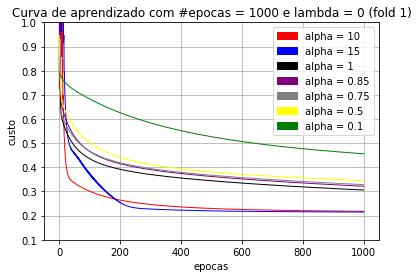

erro binario  0.0625
erro binario  0.06875
erro binario  0.1375
erro binario  0.1375
erro binario  0.15
erro binario  0.15625
erro binario  0.21875


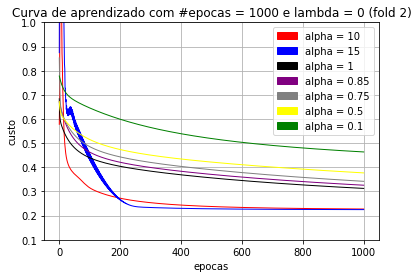

erro binario  0.09375
erro binario  0.0875
erro binario  0.1125
erro binario  0.13125
erro binario  0.125
erro binario  0.1375
erro binario  0.1625


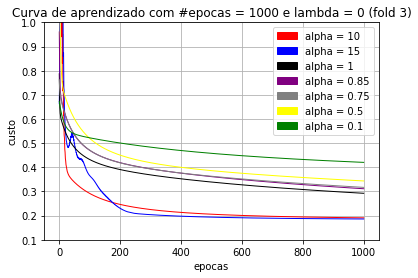

erro binario  0.1
erro binario  0.09375
erro binario  0.13125
erro binario  0.14375
erro binario  0.14375
erro binario  0.15625
erro binario  0.19375


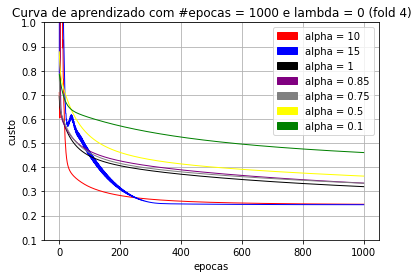

erro binario  0.08125
erro binario  0.08125
erro binario  0.13125
erro binario  0.1375
erro binario  0.13125
erro binario  0.14375
erro binario  0.20625


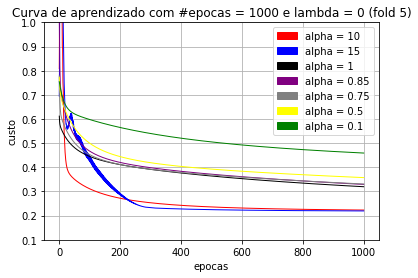

In [13]:
RLR = RegularizedLogisticRegression()
MS = ModelSelection()
DTS = DATASET()
PLT = Plot()

# carrega dataset
X,Y = RLR.load_dataset('datasets/mnist.csv', header=True)

# normaliza
X_ =  DTS.dataset_scaling(X)
alphas = [10, 15, 1, 0.85, 0.75, 0.5, 0.1]
epochs = [1000]
Lambda = 0
colors = ['red', 'blue', 'black', 'purple', 'gray', 'yellow', 'green']
fold = 1

for train,test in MS.k_fold(X_, k=5, shuffle=True):
    #print train, "\n\n", test, "\n"
    #print "train: ", X[train].shape, Y[train].shape
    #print "test: ",X[test].shape, Y[test].shape, "\n\n\n"
    
    for e in epochs:
        legends = []
        for i,a in enumerate(alphas):
            RLR.fit(X_[train], Y[train], epochs=e, learning_rate=a, Lambda=Lambda, print_results=False)
            
            print "erro binario ", RLR.binary_error(X_[train], Y[train])
            plt.plot(range(e+1), RLR.loss, color=colors[i], linewidth=1)
            legends.append(mpatches.Patch(color=colors[i], label='alpha = ' + str(a)))
        title = 'Curva de aprendizado com #epocas = ' + str(e) + ' e lambda = ' + str(Lambda) + ' (fold ' + str(fold) + ')'
        plt.ylim([0.1, 1])
        plt.xlabel('epocas')
        plt.ylabel('custo')
        plt.legend(handles=legends[:], loc='upper right')
        plt.title(title)
        plt.grid(True)

        plt.show()
        #plt.savefig('fold' + str(fold) + '.eps')
        fold += 1